<html><body><center><h1>Touseef Ahmed</h1>
<h1> Intern Data Science</h1>
</body>
</html>

In [ ]:
!pip install pandas
!pip install missingno

In [ ]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('globalterrorism.csv',encoding = "ISO-8859-1")
df.head()

/var/folders/bb/b4fvs81n0gs_1th2wm2nstbc0000gp/T/ipykernel_1622/1411381949.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('globalterrorism.csv',encoding = "ISO-8859-1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.shape

(181691, 135)

In [ ]:
#pre-processing
null_sum=(df.isnull().sum()/len(df))*100
percent_null=null_sum.sort_values(ascending=False)
type(percent_null)
high_null_column=percent_null[percent_null>=50]
less_than_50_null_column=percent_null[~percent_null.isin(high_null_column)]
print(f'Number of column where null value less than fifty percent {len(less_than_50_null_column)}')
less_null_column=less_than_50_null_column.index.to_list()
print(less_null_column)

Number of column where null value less than fifty percent 58
['nperps', 'nperpcap', 'nwoundte', 'weapdetail', 'nkillter', 'scite1', 'summary', 'claimed', 'nwoundus', 'nkillus', 'corp1', 'weapsubtype1', 'weapsubtype1_txt', 'nwound', 'targsubtype1', 'targsubtype1_txt', 'nkill', 'longitude', 'latitude', 'natlty1', 'natlty1_txt', 'target1', 'city', 'provstate', 'guncertain1', 'ishostkid', 'specificity', 'doubtterr', 'multiple', 'crit1', 'iyear', 'iday', 'imonth', 'targtype1_txt', 'gname', 'individual', 'dbsource', 'country', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'extended', 'region_txt', 'country_txt', 'region', 'crit2', 'targtype1', 'weaptype1', 'weaptype1_txt', 'attacktype1_txt', 'attacktype1', 'vicinity', 'suicide', 'success', 'crit3', 'property', 'eventid']


In [ ]:
new_df=df[less_null_column]
check=new_df.columns.to_list()

In [ ]:
selected_columns_1=['eventid', 'iyear', 'imonth', 'iday','country_txt','region_txt','city','multiple', 'success', 'suicide',
 'attacktype1_txt', 'targtype1_txt',  'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'weaptype1_txt','nkill','nwoundus', 'claimed', 'individual', 'INT_LOG', 'doubtterr', 'INT_MISC', 'specificity','gname', 'ishostkid', 'INT_ANY', 'guncertain1', 'provstate']
len(check)-len(selected_columns_1)

28

In [ ]:
print(list((set(check)) - (set(selected_columns_1))))

['crit1', 'attacktype1', 'dbsource', 'latitude', 'scite1', 'crit3', 'targtype1', 'vicinity', 'nkillter', 'summary', 'weapsubtype1', 'longitude', 'property', 'weapdetail', 'nkillus', 'nperps', 'weaptype1', 'nwound', 'nwoundte', 'extended', 'crit2', 'natlty1', 'nperpcap', 'weapsubtype1_txt', 'country', 'region', 'INT_IDEO', 'targsubtype1']


In [ ]:
df1=df[selected_columns_1]

In [ ]:
df1.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,city,multiple,success,suicide,...,individual,INT_LOG,doubtterr,INT_MISC,specificity,gname,ishostkid,INT_ANY,guncertain1,provstate
0,1.970000e+11,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,0.0,1,0,...,0,0,0.0,0,1.0,MANO-D,0.0,0,0.0,NaN
1,1.970000e+11,1970,0,0,Mexico,North America,Mexico city,0.0,1,0,...,0,0,0.0,1,1.0,23rd of September Communist League,1.0,1,0.0,Federal
2,1.970010e+11,1970,1,0,Philippines,Southeast Asia,Unknown,0.0,1,0,...,0,-9,0.0,1,4.0,Unknown,0.0,1,0.0,Tarlac
3,1.970010e+11,1970,1,0,Greece,Western Europe,Athens,0.0,1,0,...,0,-9,0.0,1,1.0,Unknown,0.0,1,0.0,Attica
4,1.970010e+11,1970,1,0,Japan,East Asia,Fukouka,0.0,1,0,...,0,-9,-9.0,1,1.0,Unknown,0.0,1,0.0,Fukouka


In [ ]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,181681,181682,181683,181684,181685,181686,181687,181688,181689,181690
eventid,197000000000.0,197000000000.0,197001000000.0,197001000000.0,197001000000.0,197001000000.0,197001000000.0,197001000000.0,197001000000.0,197001000000.0,...,201712000000.0,201712000000.0,201712000000.0,201712000000.0,201712000000.0,201712000000.0,201712000000.0,201712000000.0,201712000000.0,201712000000.0
iyear,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
imonth,7,0,1,1,1,1,1,1,1,1,...,12,12,12,12,12,12,12,12,12,12
iday,2,0,0,0,0,1,2,2,2,3,...,31,31,31,31,31,31,31,31,31,31
country_txt,Dominican Republic,Mexico,Philippines,Greece,Japan,United States,Uruguay,United States,United States,United States,...,Philippines,Italy,Afghanistan,India,Afghanistan,Somalia,Syria,Philippines,India,Philippines
region_txt,Central America & Caribbean,North America,Southeast Asia,Western Europe,East Asia,North America,South America,North America,North America,North America,...,Southeast Asia,Western Europe,South Asia,South Asia,South Asia,Sub-Saharan Africa,Middle East & North Africa,Southeast Asia,South Asia,Southeast Asia
city,Santo Domingo,Mexico city,Unknown,Athens,Fukouka,Cairo,Montevideo,Oakland,Madison,Madison,...,Shariff Aguak,Spinetoli,Kohistan district,Hungrum,Maymana,Ceelka Geelow,Jableh,Kubentog,Imphal,Cotabato City
multiple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
success,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,0,0
suicide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
 (df1.isnull().sum()/len(df1))*100

eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
country_txt          0.000000
region_txt           0.000000
city                 0.239417
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1_txt      0.000000
targtype1_txt        0.000000
targsubtype1_txt     5.709144
corp1               23.419982
target1              0.351146
natlty1_txt          0.858050
weaptype1_txt        0.000000
nkill                5.676120
nwoundus            35.611010
claimed             36.391456
individual           0.000000
INT_LOG              0.000000
doubtterr            0.000550
INT_MISC             0.000000
specificity          0.003302
gname                0.000000
ishostkid            0.097969
INT_ANY              0.000000
guncertain1          0.209146
provstate            0.231712
dtype: float64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  float64
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   country_txt       181691 non-null  object 
 5   region_txt        181691 non-null  object 
 6   city              181256 non-null  object 
 7   multiple          181690 non-null  float64
 8   success           181691 non-null  int64  
 9   suicide           181691 non-null  int64  
 10  attacktype1_txt   181691 non-null  object 
 11  targtype1_txt     181691 non-null  object 
 12  targsubtype1_txt  171318 non-null  object 
 13  corp1             139139 non-null  object 
 14  target1           181053 non-null  object 
 15  natlty1_txt       180132 non-null  object 
 16  weaptype1_txt     18

In [ ]:
#EDA
attack_per_year=df1['iyear'].value_counts()

/Users/shekhawat/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shekhawat/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


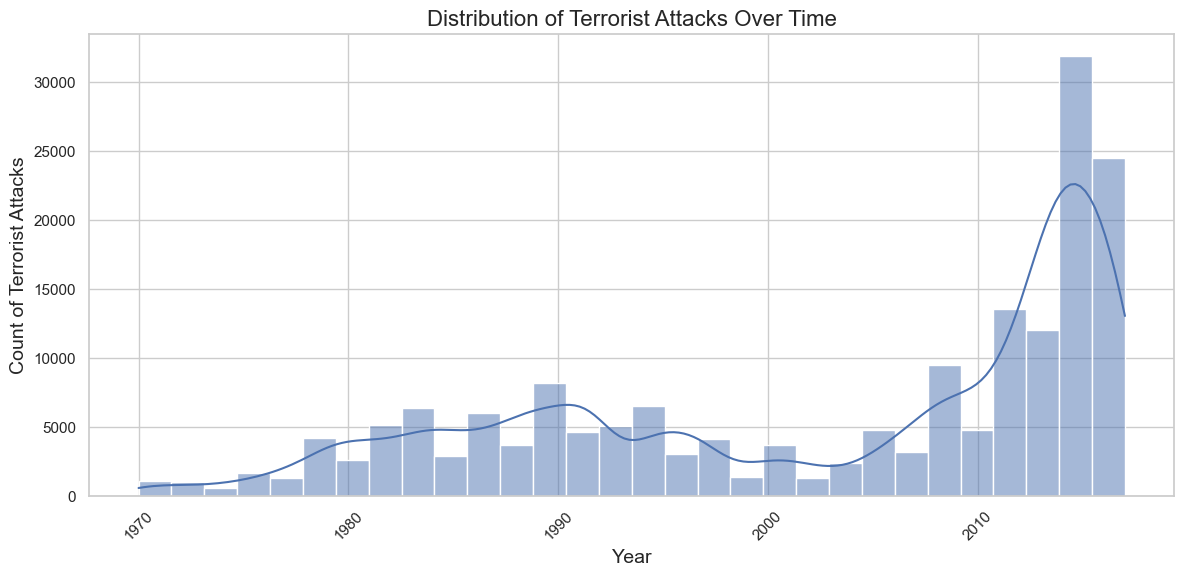

In [ ]:

plt.figure(figsize=(14, 6))
sns.histplot(data=df1, x='iyear', stat="count", bins=30, kde=True)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of Terrorist Attacks', fontsize=14)
plt.title('Distribution of Terrorist Attacks Over Time', fontsize=16)
plt.xticks(rotation=45)
plt.show()


/Users/shekhawat/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shekhawat/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shekhawat/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


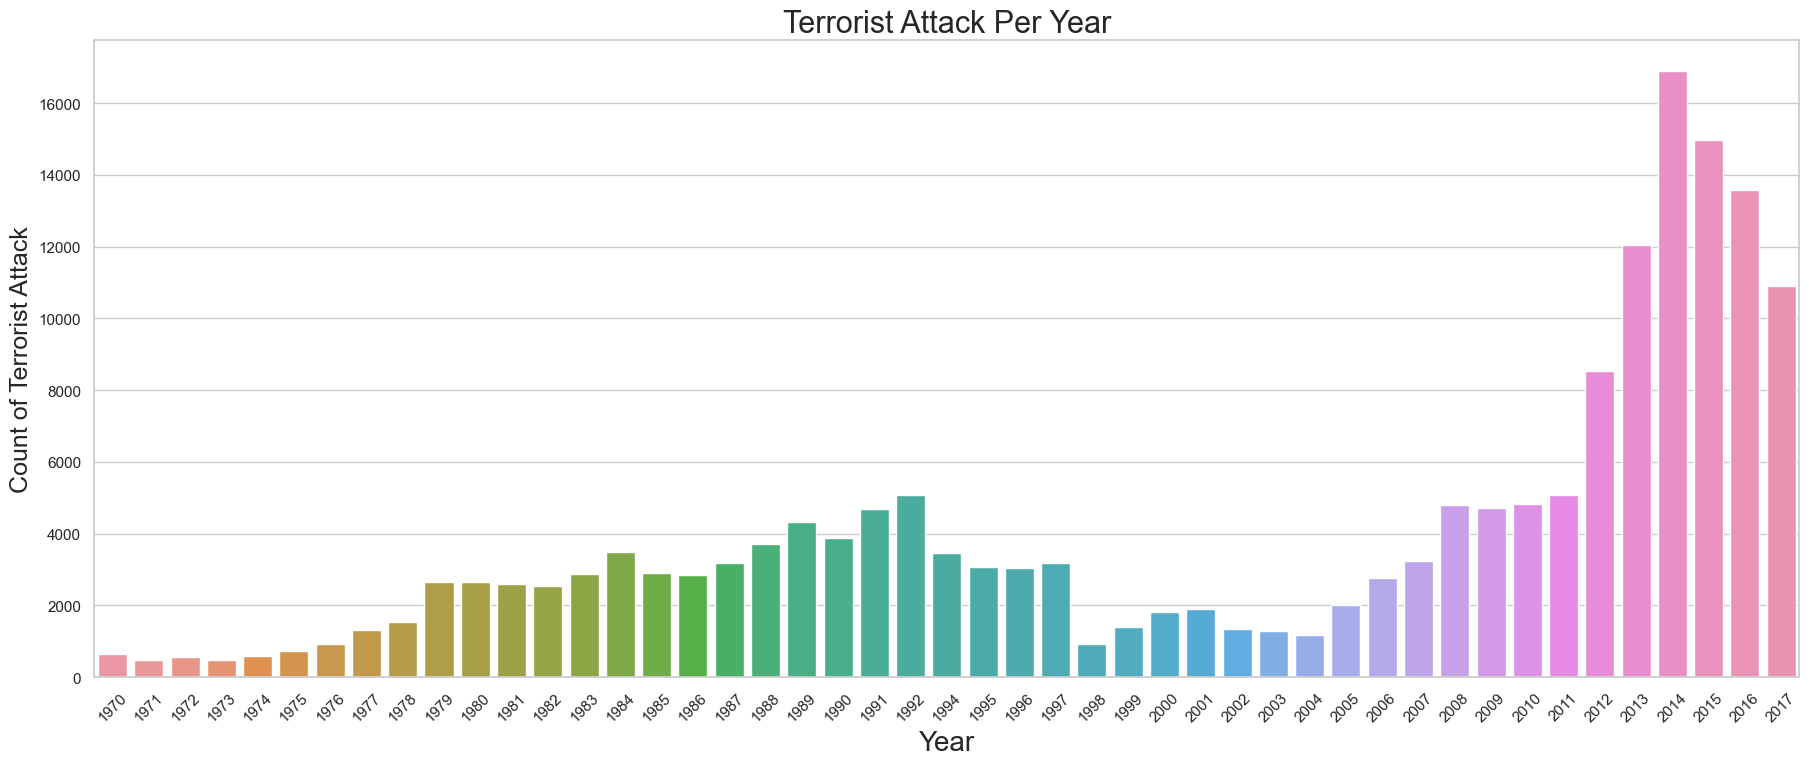

In [ ]:
ax=plt.rcParams['figure.figsize'] = 22,8.27
ax=sns.countplot(x='iyear',data=df1)
ax.set_xlabel('Year',fontsize=20)
plt.xticks(rotation = 45)
ax.set_ylabel('Count of Terrorist Attack',fontsize=18)
ax.set_title('Terrorist Attack Per Year',fontsize=22);

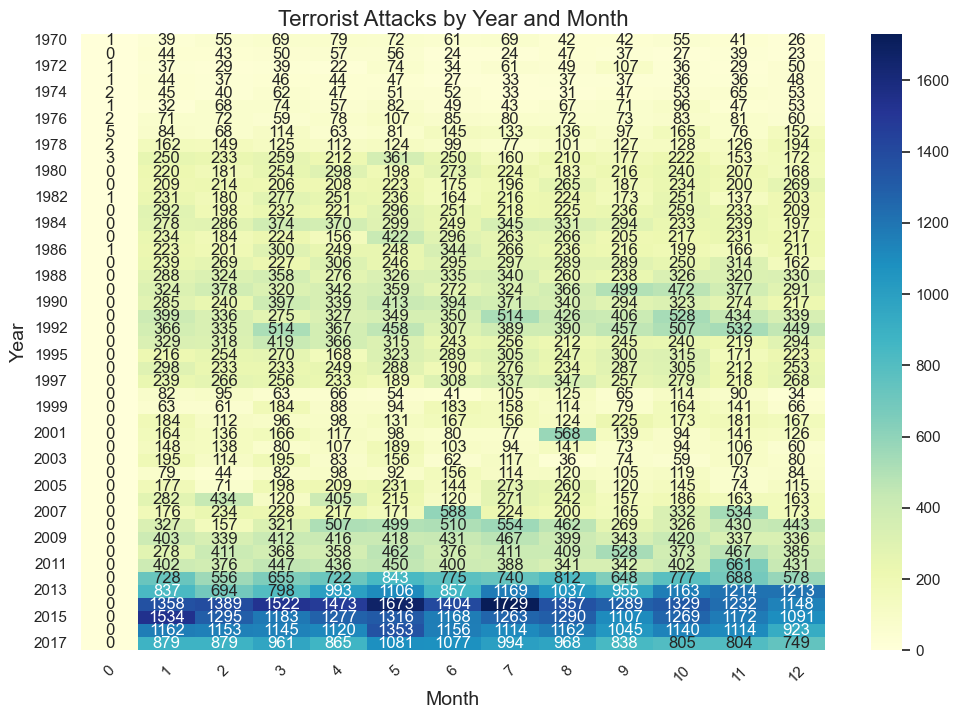

In [ ]:

attacks_by_year_month = df1.groupby(['iyear', 'imonth']).size().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(attacks_by_year_month, cmap='YlGnBu', annot=True, fmt='g')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.title('Terrorist Attacks by Year and Month', fontsize=16)
plt.xticks(rotation=45)
plt.show()


In [ ]:
df1['gname'].value_counts()

gname
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: count, Length: 3537, dtype: int64

/Users/shekhawat/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shekhawat/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


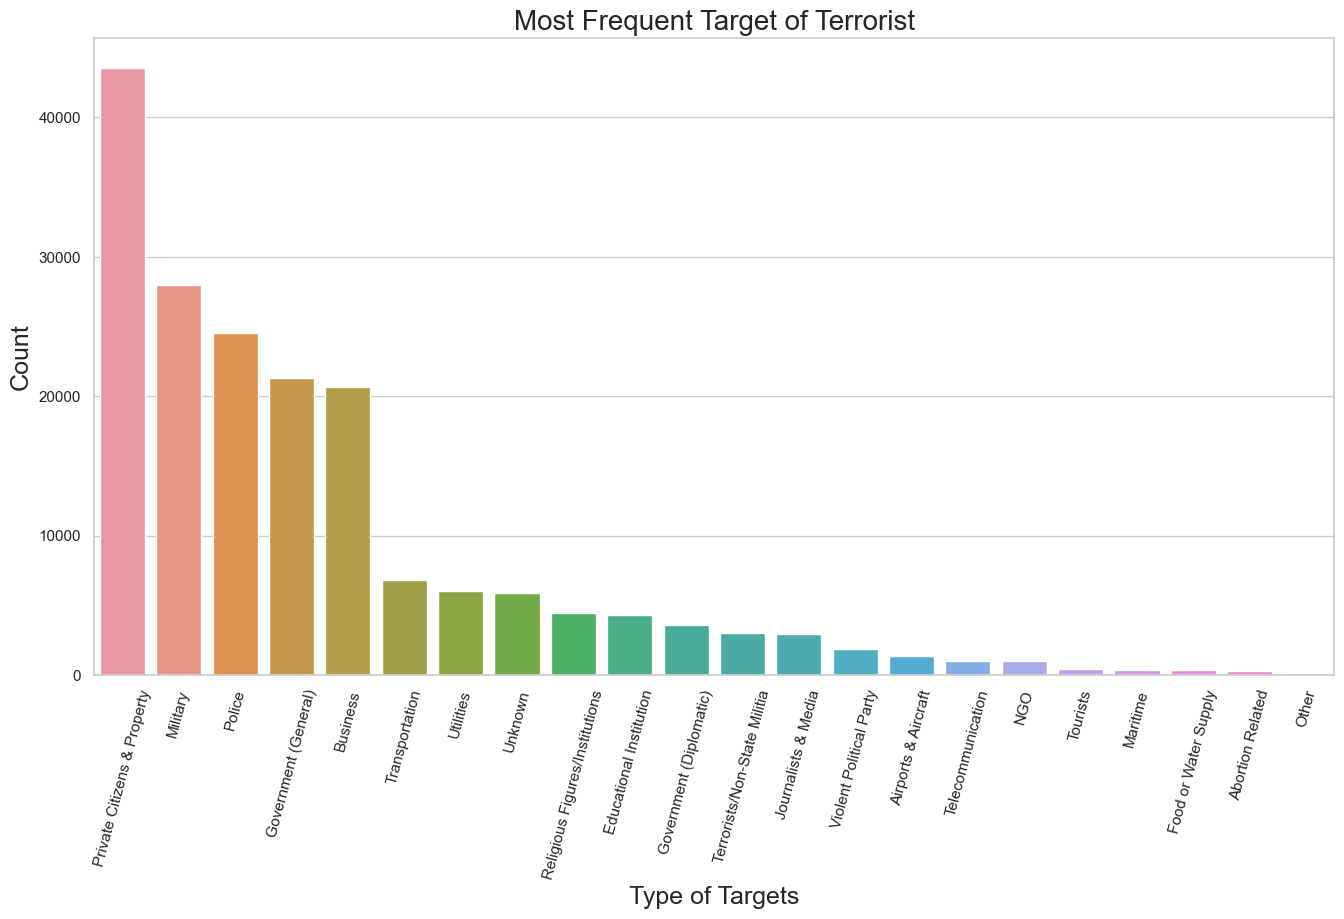

In [ ]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='targtype1_txt',data=df1,order = df1['targtype1_txt'].value_counts().index)
ax.set_xlabel('Type of Targets',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequent Target of Terrorist',fontsize=20);

/Users/shekhawat/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shekhawat/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shekhawat/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


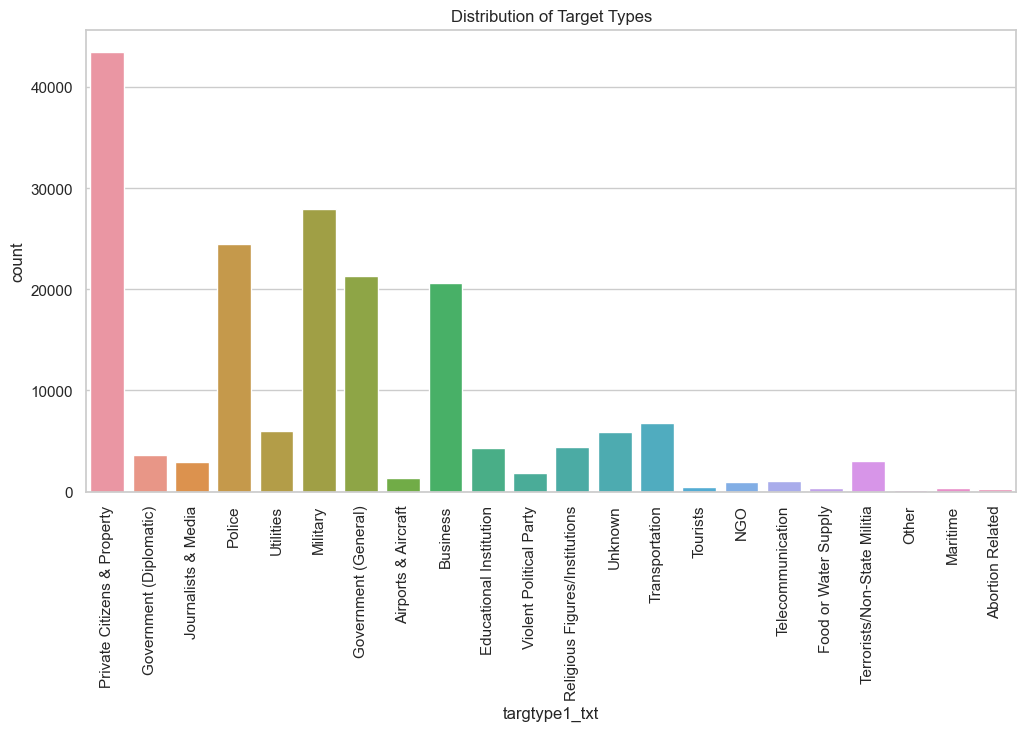

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='targtype1_txt', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Target Types')
plt.show()


In [ ]:
print('\n')
print(('*')*20)
print('Value count of Object Type Category which if greater than 50')
print('\n')
print(('*')*20)
cat_col=df1.select_dtypes('object').columns.to_list()
for col in cat_col:
  if len(df1[col].value_counts())<50:
    print(df1[col].value_counts())
    print('\n')
    print(('*')*20)





********************
Value count of Object Type Category which if greater than 50


********************
region_txt
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: count, dtype: int64


********************
attacktype1_txt
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking    

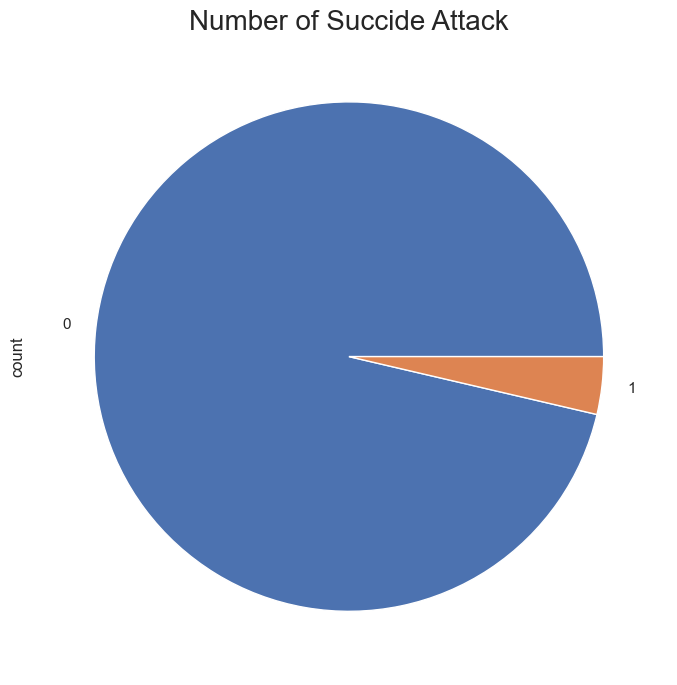

In [ ]:
ax=df1['suicide'].value_counts().plot(kind='pie')
ax.set_title('Number of Succide Attack',fontsize=20);

/var/folders/bb/b4fvs81n0gs_1th2wm2nstbc0000gp/T/ipykernel_1622/3525416903.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x="iyear", y="Total_Attacks", hue='success', ci=None ,data=attack_per_year)
/Users/shekhawat/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shekhawat/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shekhawat/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtyp

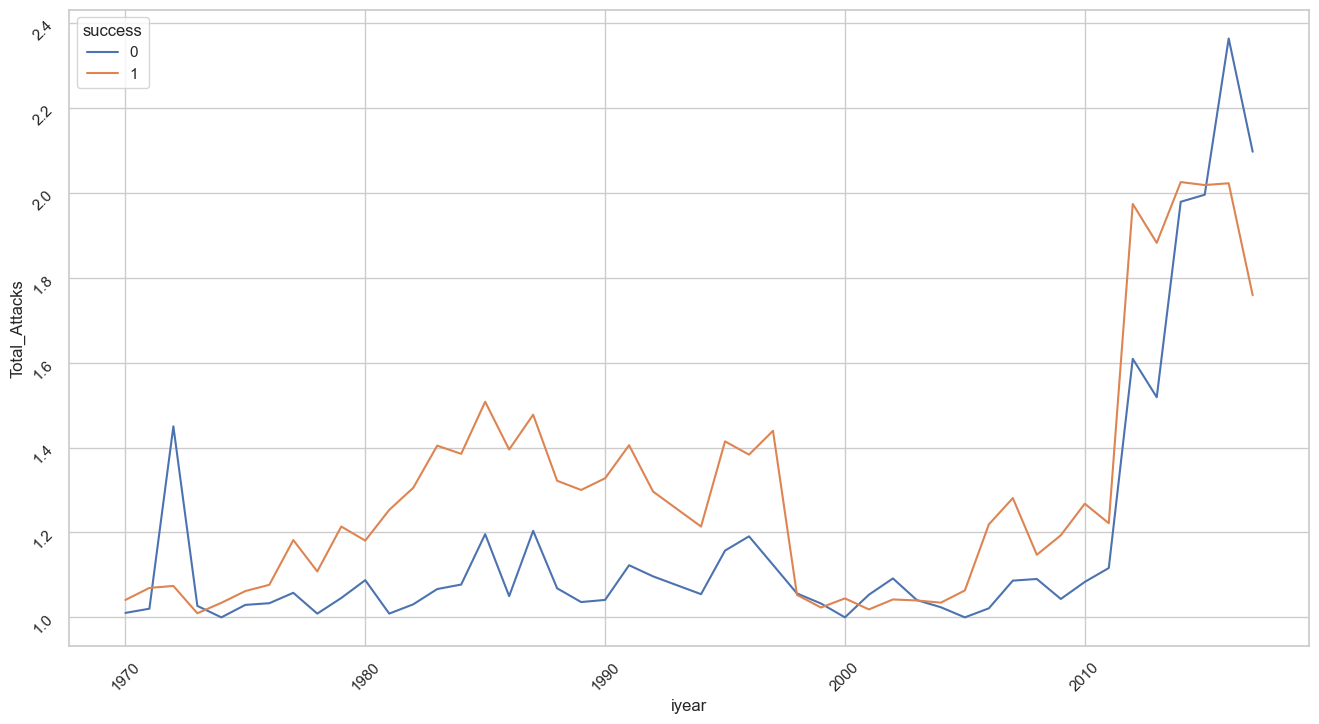

In [ ]:
ax = sns.lineplot(x="iyear", y="Total_Attacks", hue='success', ci=None ,data=attack_per_year)
ax.tick_params(rotation=45)